In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)

plt.rc("font", family = "gulim")
plt.rc("axes", unicode_minus = False)

1.5.1


In [71]:
mtcars = pd.read_excel("../dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [72]:
train_X = mtcars.loc[:, "cyl":"qsec"]
train_y = mtcars.loc[:, "mpg"]

print(train_X.head())
print(train_y.head())

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [74]:
print("Train R-square = ", lr.score(train_X, train_y))

Train R-square =  0.8548224115848233


In [75]:
pd.DataFrame(lr.coef_, index = train_X.columns, columns = ["coefficient"])

,coefficient
cyl,-0.818560
disp,0.013205
hp,-0.017930
drat,1.320406
wt,-4.190832
qsec,0.401461


In [76]:
## KNN(k-nearest neigbors classifier)

# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [77]:
print("도미 무게 = {:.4f}, 길이 = {:4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))

도미 무게 = 617.8286, 길이 = 33.108571
방어 무게 = 11.1786, 길이 = 11.9214


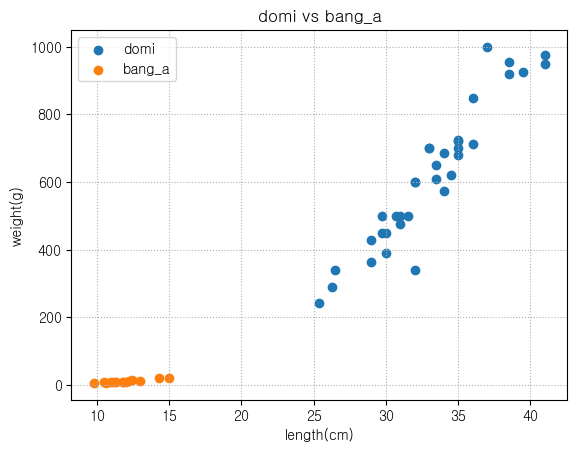

In [78]:
##
plt.scatter(bream_length, bream_weight, label = "domi")
plt.scatter(smelt_length, smelt_weight, label = "bang_a")
plt.title("domi vs bang_a")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()


In [79]:
##list
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
print(np.shape(length), np.shape(weight))

##x_2d(matrix)
fish_data = np.column_stack([length, weight])
print(type(fish_data))
print(np.shape(fish_data))

(49,) (49,)
<class 'numpy.ndarray'>
(49, 2)


In [80]:
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights = "uniform",
                           metric = "minkowski",
                           p = 2)

In [83]:
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [84]:
print("Train Acc = ", knn.score(fish_data, fish_target))

Train Acc =  1.0


In [85]:
##Attribute
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes =  [0. 1.]
metrics =  euclidean
samples =  49


In [86]:
np.column_stack([fish_data, fish_target])

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [87]:
idx = np.arange(49)
np.random.shuffle(idx)
print(idx)

[ 2 13  5 25 14 41 38 39  3 44 36 40 18 15 33 37  8 26  4 10  1 47 22 24
 31 48 23 17 45 16 21 43 28 19 20 32 42 29 35  7  0 46 27  9  6 30 11 34
 12]


In [88]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[:35]]
test_y = fish_target[idx[:35]]

print(np.column_stack((train_X, train_y)))
print(np.column_stack((test_X, test_y)))


[[ 26.5 340.    1. ]
 [ 32.  340.    1. ]
 [ 29.7 450.    1. ]
 [ 35.  725.    1. ]
 [ 32.  600.    1. ]
 [ 11.8  10.    0. ]
 [ 11.    9.7   0. ]
 [ 11.2   9.8   0. ]
 [ 29.  363.    1. ]
 [ 12.2  12.2   0. ]
 [ 10.5   7.5   0. ]
 [ 11.3   8.7   0. ]
 [ 33.5 610.    1. ]
 [ 32.  600.    1. ]
 [ 41.  975.    1. ]
 [ 10.6   7.    0. ]
 [ 30.  450.    1. ]
 [ 35.  720.    1. ]
 [ 29.  430.    1. ]
 [ 31.  475.    1. ]
 [ 26.3 290.    1. ]
 [ 14.3  19.7   0. ]
 [ 34.5 620.    1. ]
 [ 35.  700.    1. ]
 [ 38.5 955.    1. ]
 [ 15.   19.9   0. ]
 [ 35.  680.    1. ]
 [ 33.  700.    1. ]
 [ 12.4  13.4   0. ]
 [ 33.  700.    1. ]
 [ 34.  685.    1. ]
 [ 12.    9.8   0. ]
 [ 36.  850.    1. ]
 [ 33.5 650.    1. ]
 [ 34.  575.    1. ]]
[[ 26.5 340.    1. ]
 [ 32.  340.    1. ]
 [ 29.7 450.    1. ]
 [ 35.  725.    1. ]
 [ 32.  600.    1. ]
 [ 11.8  10.    0. ]
 [ 11.    9.7   0. ]
 [ 11.2   9.8   0. ]
 [ 29.  363.    1. ]
 [ 12.2  12.2   0. ]
 [ 10.5   7.5   0. ]
 [ 11.3   8.7   0. ]
 [ 33.5 610.

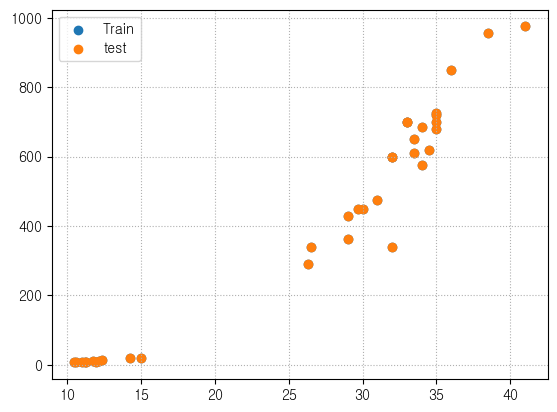

In [89]:
plt.scatter(train_X[:,0], train_X[:,1], label = "Train")
plt.scatter(test_X[:,0], test_X[:,1], label = "test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [90]:
knn = KNeighborsClassifier(n_neighbors= 5,
                           weights = "uniform",
                           metric = "minkowski",
                           p = 2)


In [91]:
knn.fit(train_X, train_y)
print("Test Acc = ", knn.score(test_X, test_y))
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)

Test Acc =  1.0
classes =  [0. 1.]
metrics =  euclidean
sample =  35


In [92]:
from sklearn.model_selection import train_test_split

In [122]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify=fish_target
)
print(train_X)

[[  26.3  290. ]
 [  34.   685. ]
 [  14.3   19.7]
 [  32.   600. ]
 [  37.  1000. ]
 [  29.   363. ]
 [  35.   680. ]
 [  31.   500. ]
 [  11.     9.7]
 [  38.5  955. ]
 [   9.8    6.7]
 [  31.5  500. ]
 [  34.   575. ]
 [  12.4   13.4]
 [  35.   700. ]
 [  25.4  242. ]
 [  11.2    9.8]
 [  39.5  925. ]
 [  36.   850. ]
 [  10.6    7. ]
 [  10.5    7.5]
 [  35.   725. ]
 [  11.3    8.7]
 [  29.7  450. ]
 [  41.   950. ]
 [  30.7  500. ]
 [  33.5  610. ]
 [  26.5  340. ]
 [  12.     9.8]
 [  13.    12.2]
 [  31.   475. ]
 [  38.5  920. ]
 [  36.   714. ]
 [  34.5  620. ]
 [  32.   340. ]
 [  33.5  650. ]]


In [94]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

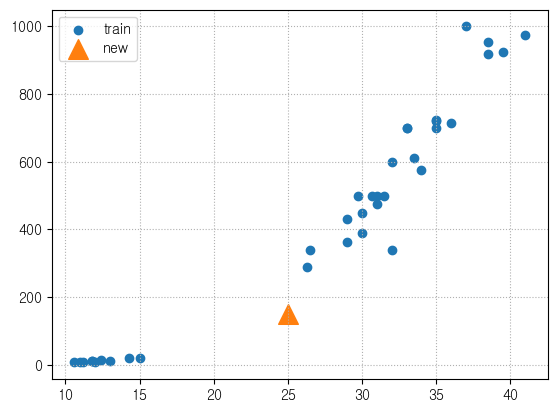

In [95]:
plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [96]:
knn.predict([[25, 150]])

array([0.])

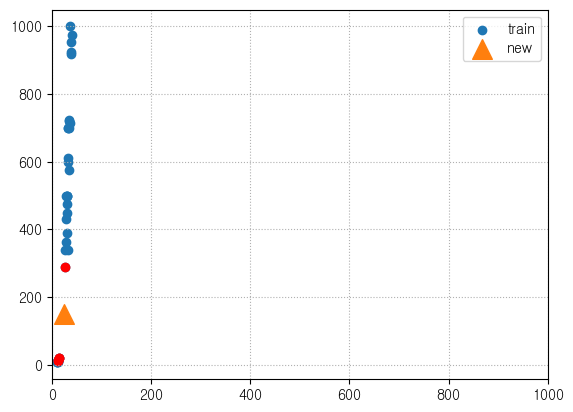

In [99]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], color = "red")
plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [102]:
mean = np.mean(train_X, axis = 0)
std = np.std(train_X, axis = 0)

train_scaled = (train_X - np.mean(train_X, axis = 0))/np.std(train_X, axis = 0)
train_scaled


array([[-1.57153619, -1.3502073 ],
       [ 0.99266819,  1.72259624],
       [ 0.17863505, -0.2543514 ],
       [ 1.1452994 ,  1.58293746],
       [ 0.4330204 ,  0.170832  ],
       [-1.63258868, -1.35051766],
       [ 0.58565162,  0.7915377 ],
       [ 0.17863505, -0.04641499],
       [-0.07575031, -0.32573255],
       [ 0.38214333,  0.09324379],
       [ 0.48389748,  0.48118485],
       [-1.31715084, -1.31979272],
       [ 0.58565162,  0.7915377 ],
       [-1.57153619, -1.34989695],
       [ 0.48389748, -0.32573255],
       [ 0.28038919, -0.17055613],
       [ 0.63652869,  0.51222013],
       [-1.65293951, -1.35082801],
       [ 0.38214333,  0.170832  ],
       [ 0.7891599 ,  0.85360826],
       [ 0.68740576,  0.40359664],
       [ 0.89091404,  0.83498709],
       [ 0.7891599 ,  0.86912591],
       [ 0.35161709,  0.170832  ],
       [-0.09610113, -0.48090898],
       [-1.51048371, -1.33934495],
       [-1.69364117, -1.35920754],
       [ 1.24705354,  1.4898316 ],
       [ 1.39968475,

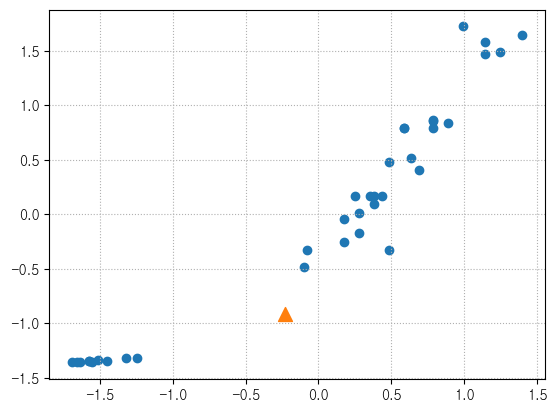

In [106]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^", s = 100)
plt.grid(linestyle = ":")
plt.show()




In [113]:
test_scaled = (test_X - mean) / std

knn.fit(test_scaled, test_y)
print("Test Acc = ", knn.score(test_scaled, test_y))
print("prediction",knn.predict([new]))

Test Acc =  1.0
prediction [0.]


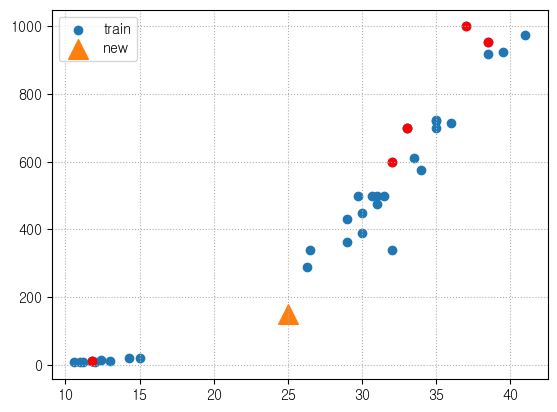

In [114]:
distacne, index = knn.kneighbors([new])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], color = "red")
plt.legend()

plt.grid(linestyle = ":")
plt.show()

In [115]:
## GridSearch

knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

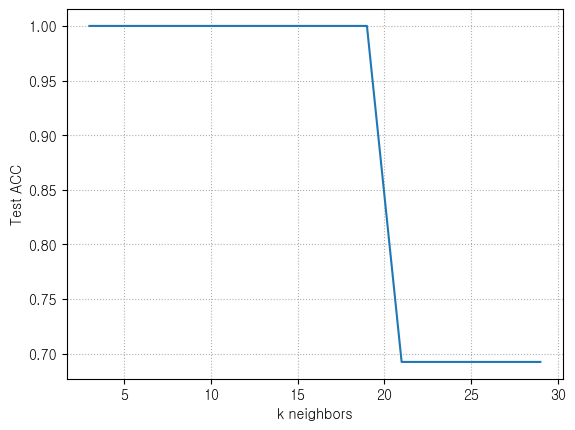

In [120]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
